In [125]:
import pandas as pd

In [126]:
bm_data = pd.read_csv('gist-baemin.csv')
bm_data

,Unnamed: 0,storeNo,name,lat,lng,address
0,0,13655029,바른국밥 첨단점,35.211722,126.837374,광주광역시 광산구 첨단내촌로 56 1층(월계동)
1,1,13701546,록시드갸토 첨단아크레타점,35.214249,126.846429,"광주광역시 광산구 임방울대로800번길 71 아크레타 첨단1층 105,106호(월계동)"
2,2,10646557,크리스피크림도넛 광주첨단점,35.217221,126.842457,"광주광역시 광산구 월계동 867-1 1층 113,114(일부)호 (월계동, 첨단센츄..."
3,3,13414085,인끼밥상,35.218221,126.845623,"광주광역시 광산구 쌍암동 669-4 (쌍암동,105.106호(1층))"
4,4,13911414,챙길 밥 첨단신도시점,35.210916,126.837069,광주광역시 광산구 첨단내촌로 45-4 1층(월계동)
...,...,...,...,...,...,...
2041,2041,13203939,쏘핫 마라탕&마라샹궈,35.206500,126.859484,광주광역시 북구 첨단연신로91번길 44 대성빌딩 1층 108호(신용동)
2042,2042,13447691,까로치아 첨단점,35.211305,126.838069,광주광역시 광산구 월계동 835-4 1층(월계동)
2043,2043,13885594,하이덮밥,35.203890,126.870372,"광주광역시 북구 양산제로 109-7 , 1층(연제동)"
2044,2044,13203939,쏘핫 마라탕&마라샹궈,35.206500,126.859484,광주광역시 북구 첨단연신로91번길 44 대성빌딩 1층 108호(신용동)


In [127]:
bm_data_latlng = bm_data[['lat','lng']]

In [128]:
bm_data_latlng

,lat,lng
0,35.211722,126.837374
1,35.214249,126.846429
2,35.217221,126.842457
3,35.218221,126.845623
4,35.210916,126.837069
...,...,...
2041,35.206500,126.859484
2042,35.211305,126.838069
2043,35.203890,126.870372
2044,35.206500,126.859484


In [129]:
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

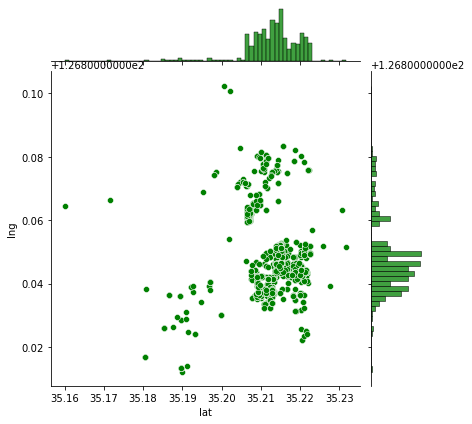

In [130]:
sns.jointplot(x=bm_data_latlng['lat'],y=bm_data_latlng['lng'],color='green',kind='scatter')

In [93]:
from sklearn.cluster import KMeans

In [94]:
ks = range(1,500)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(bm_data_latlng)
    inertias.append(model.inertia_)
    if k%10 == 0:
        print(str(k/10)+"% complete")


1.0% complete
2.0% complete
3.0% complete
4.0% complete
5.0% complete
6.0% complete
7.0% complete
8.0% complete
9.0% complete
10.0% complete
11.0% complete
12.0% complete
13.0% complete
14.0% complete
15.0% complete
16.0% complete
17.0% complete
18.0% complete
19.0% complete
20.0% complete
21.0% complete
22.0% complete
23.0% complete
24.0% complete
25.0% complete
26.0% complete
27.0% complete
28.0% complete
29.0% complete
30.0% complete
31.0% complete
32.0% complete
33.0% complete
34.0% complete
35.0% complete
36.0% complete
37.0% complete
38.0% complete
39.0% complete
40.0% complete
41.0% complete
42.0% complete
43.0% complete
44.0% complete
45.0% complete
46.0% complete
47.0% complete
48.0% complete
49.0% complete


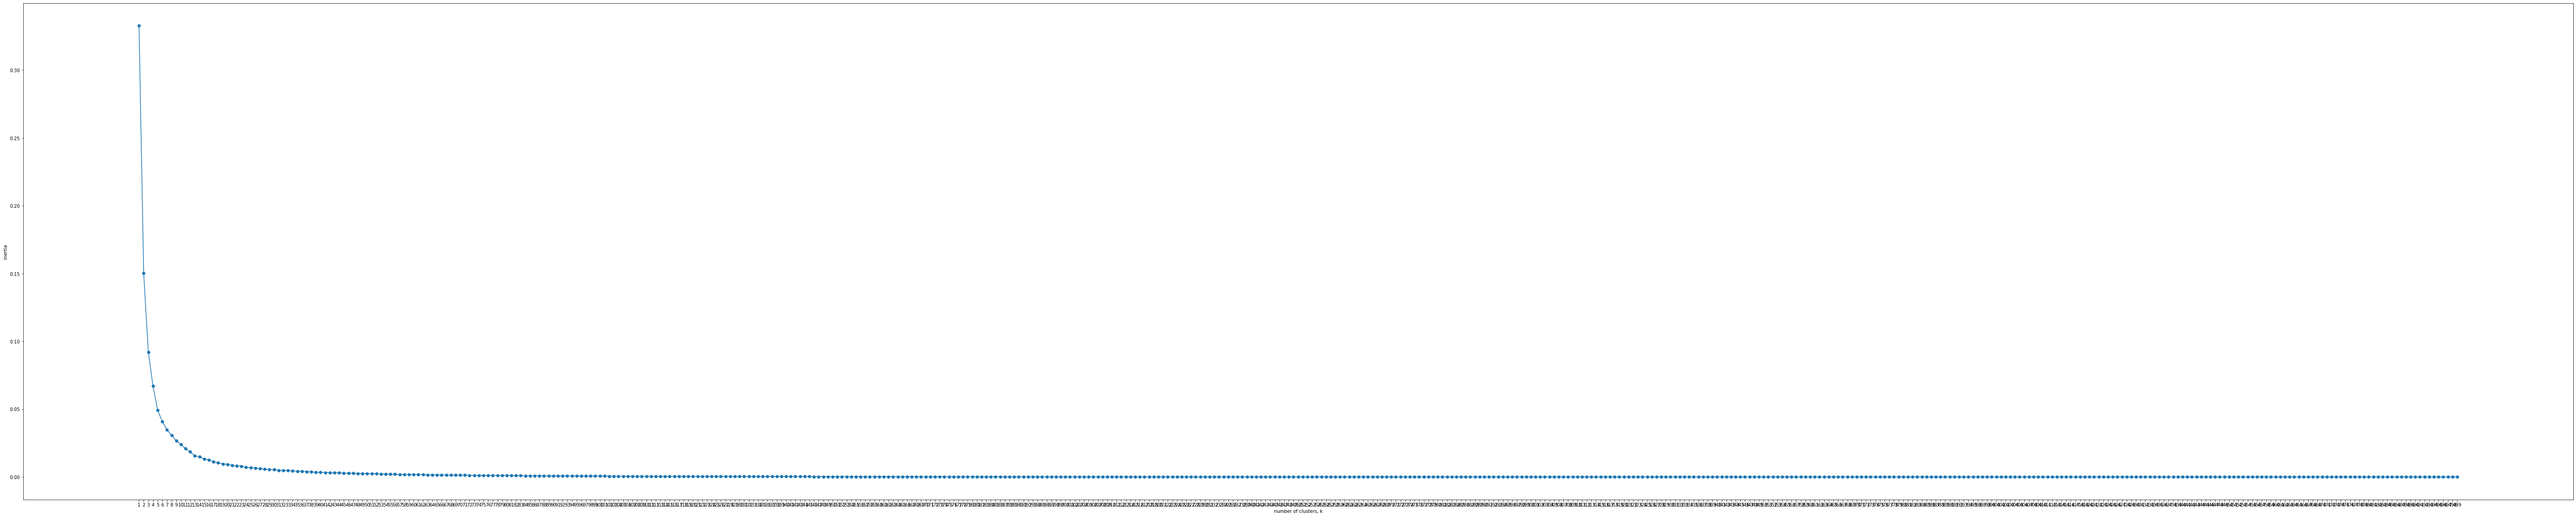

In [131]:
# Plot ks vs inertias
plt.figure(figsize=(100, 20))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [132]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scale = scaler.fit_transform(bm_data_latlng)

k = 50

model = KMeans(n_clusters=k,random_state=10)

model.fit(data_scale)
bm_data_latlng['cluster'] = model.fit_predict(data_scale)

bm_data_latlng

/var/folders/tp/dcr77srx31sfjt_0ldrqb0hh0000gn/T/ipykernel_4108/3277573262.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bm_data_latlng['cluster'] = model.fit_predict(data_scale)


,lat,lng,cluster
0,35.211722,126.837374,48
1,35.214249,126.846429,15
2,35.217221,126.842457,34
3,35.218221,126.845623,22
4,35.210916,126.837069,48
...,...,...,...
2041,35.206500,126.859484,3
2042,35.211305,126.838069,48
2043,35.203890,126.870372,13
2044,35.206500,126.859484,3


In [133]:
clust_df = bm_data_latlng.copy()
clust_df['clust'] = pred
clust_df

,lat,lng,cluster,clust
0,35.211722,126.837374,48,46
1,35.214249,126.846429,15,2
2,35.217221,126.842457,34,22
3,35.218221,126.845623,22,27
4,35.210916,126.837069,48,46
...,...,...,...,...
2041,35.206500,126.859484,3,1
2042,35.211305,126.838069,48,46
2043,35.203890,126.870372,13,25
2044,35.206500,126.859484,3,1


In [134]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [135]:
standard_scaler = StandardScaler()
scaled_df = pd.DataFrame(standard_scaler.fit_transform(clust_df.iloc[:,0:4]), columns=clust_df.iloc[:,0:4].columns)

In [136]:
clust_model.fit(scaled_df)

centers_s = clust_model.cluster_centers_
pred_s = clust_model.predict(scaled_df)

In [137]:
clust_df['clust_s'] = pred_s
clust_df

,lat,lng,cluster,clust,clust_s
0,35.211722,126.837374,48,46,4
1,35.214249,126.846429,15,2,45
2,35.217221,126.842457,34,22,0
3,35.218221,126.845623,22,27,10
4,35.210916,126.837069,48,46,4
...,...,...,...,...,...
2041,35.206500,126.859484,3,1,11
2042,35.211305,126.838069,48,46,4
2043,35.203890,126.870372,13,25,19
2044,35.206500,126.859484,3,1,11


In [138]:
# bm_data_latlng = bm_data_latlng.groupby('cluster').mean()
bm_data_latlng.to_csv('clustered.csv',mode='w',index=False)
len(cluster_mean)

50

In [139]:
bm_data_latlng


,lat,lng,cluster
0,35.211722,126.837374,48
1,35.214249,126.846429,15
2,35.217221,126.842457,34
3,35.218221,126.845623,22
4,35.210916,126.837069,48
...,...,...,...
2041,35.206500,126.859484,3
2042,35.211305,126.838069,48
2043,35.203890,126.870372,13
2044,35.206500,126.859484,3


In [141]:
bm_data_latlng.sort_values('cluster')
clust_count = [0]*50

for i in range(len(bm_data_latlng)):
    clust_num = int(bm_data_latlng.iloc[i]['cluster'])
    clust_count[clust_num-1] = clust_count[clust_num-1] + 1

ccdf = pd.DataFrame(clust_count)
ccdf.to_csv('clusterCount.csv',mode='w',index=False)

In [142]:
bm_data_latlng

,lat,lng,cluster
0,35.211722,126.837374,48
1,35.214249,126.846429,15
2,35.217221,126.842457,34
3,35.218221,126.845623,22
4,35.210916,126.837069,48
...,...,...,...
2041,35.206500,126.859484,3
2042,35.211305,126.838069,48
2043,35.203890,126.870372,13
2044,35.206500,126.859484,3


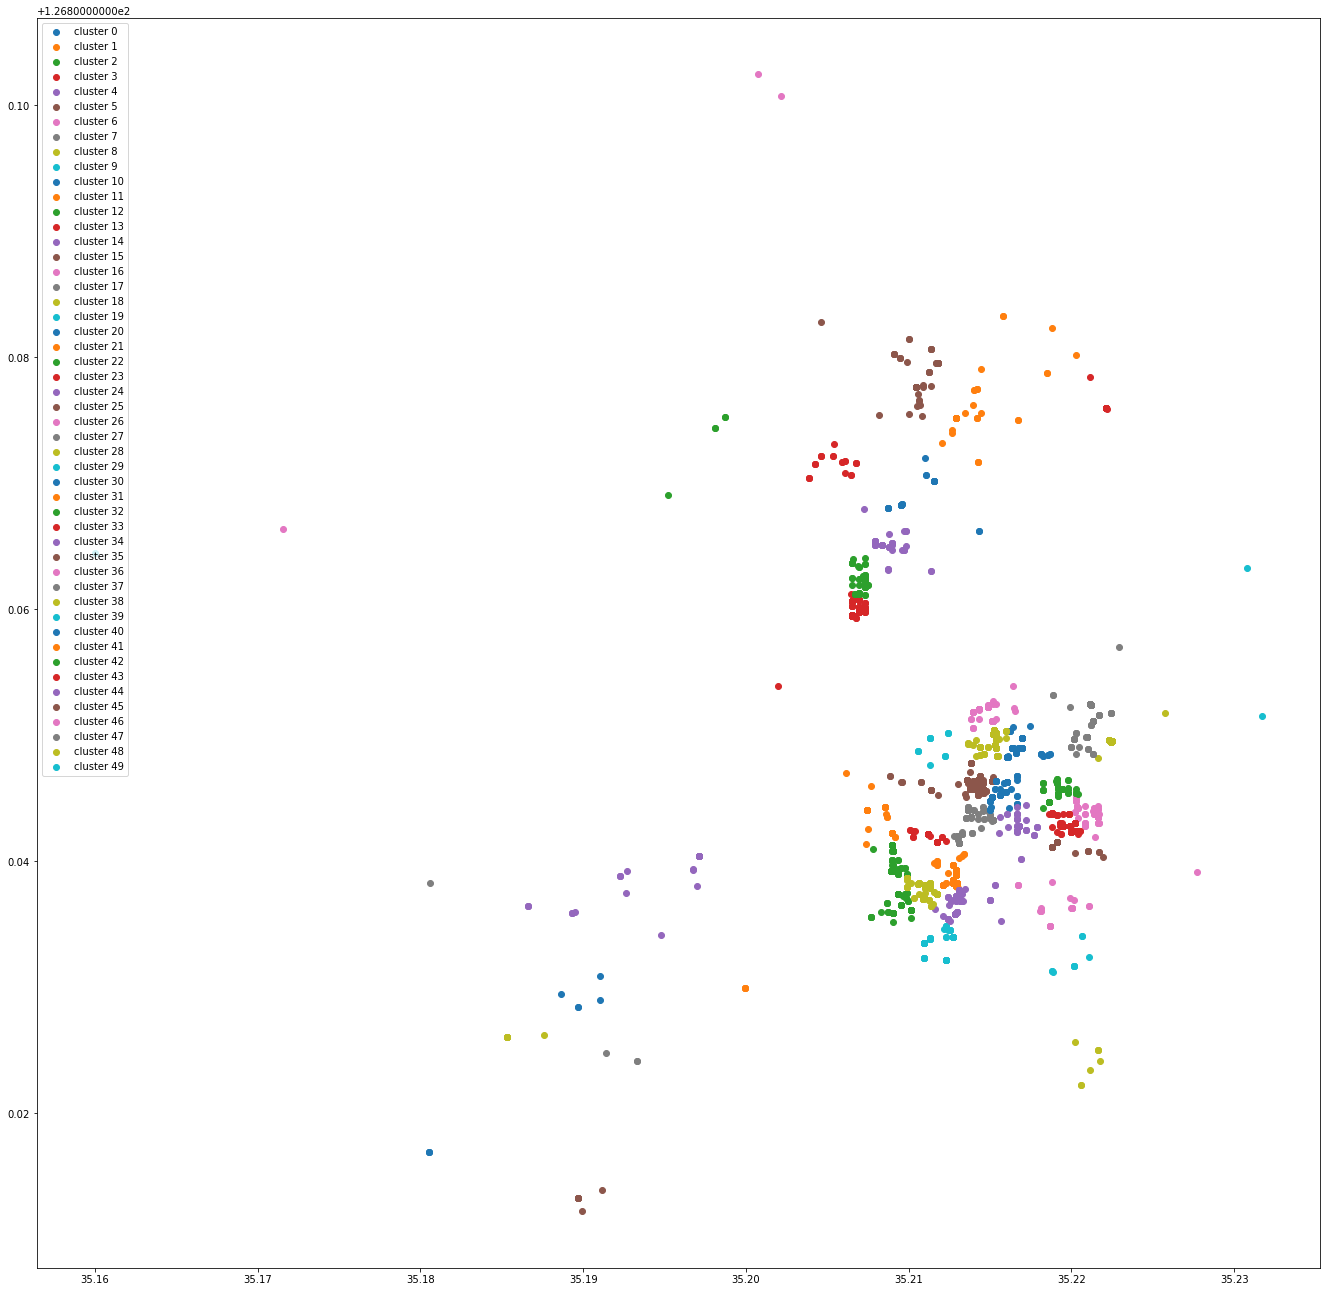

In [151]:
import matplotlib.pyplot as plt
plt.figure(figsize = (23, 23))

for i in range(50):
    plt.scatter(bm_data_latlng.loc[bm_data_latlng['cluster']==i,'lat'],bm_data_latlng.loc[bm_data_latlng['cluster']==i,'lng'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.show()

## Data를 다시 정렬한다

In [146]:
bm_data_latlng = bm_data_latlng.sort_values('cluster')

In [147]:
bm_data_latlng

,lat,lng,cluster
1289,35.216332,126.848984,0
1694,35.216055,126.848290,0
96,35.216055,126.848290,0
664,35.216082,126.848290,0
1083,35.216944,126.849762,0
...,...,...,...
671,35.211327,126.849755,49
1299,35.212389,126.850151,49
1340,35.211294,126.847656,49
448,35.212389,126.850151,49
